## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import copy
import warnings
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

## Import dataset

In [2]:
# # Mount onto Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Change to dataset folder
# %cd /content/drive/My\ Drive/Deep_Learning_Project_Data

In [14]:
# Download the CSV files
train_df = pd.read_csv('Datasets/train_data.csv', index_col = 0, parse_dates=True )
test_df = pd.read_csv('Datasets/test_data.csv', index_col = 0, parse_dates=True)

print(str(len(train_df)) +" training data points\n" +
      str(len(test_df)) + " testing data points", )

3010 training data points
753 testing data points


In [15]:
# Data will only consist of the Close column, because model is univariate.
train_df = train_df['Close']
test_df = test_df['Close']

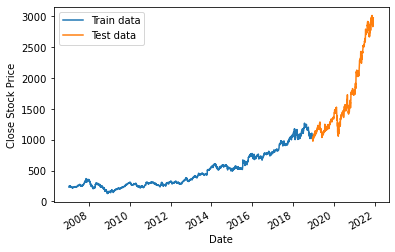

In [16]:
# Plot graph of Training and Testing data
train_df.plot(label = 'Train data')
test_df.plot(label = 'Test data')
plt.ylabel('Close Stock Price')
plt.legend()

## ARIMA model fit

In [7]:
p = 20 # Number of lag observations. Sequence length
d = 1 # Number of times the raw observations are differenced 
q = 0 # Size of the moving average window

model = ARIMA(train_df, order=(p,d,q)).fit()

In [23]:
# Forecast the next 60 days
preds = model.forecast(steps = 60)
preds = pd.Series(preds)
preds.index = test_df.index[:60]

## Get Results

In [29]:
# List of each forecast steps we want to predict for
future_points = [10,20,30,40,50,60]
error = []

# Get RMSE for each date
for point in future_points:
    rmse = mean_squared_error(test_df[:point], preds[:point], squared=False)
    error.append(rmse)
    print(str(point)+ ": " + str(round(rmse,2)))

10: 39.56
20: 31.53
30: 31.43
40: 42.89
50: 47.64
60: 64.08


In [10]:
print(error)

[39.564466879900884, 31.532121172255952, 31.429360336542896, 42.88619362379405, 47.643935377220245, 64.07792515296077]
